In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_train = pd.read_csv("./train.csv")
#df_train = df_train.drop(columns="id")
display(df_train.head())


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,4,Male,...,80,0,1,3,2,11,8,7,0,0
1,3,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,2,Male,...,80,1,20,1,1,5,9,4,4,0
2,7,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,2,Male,...,80,1,4,3,3,3,2,0,2,0
3,10,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1,Female,...,80,1,6,0,1,5,4,7,7,1
4,11,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,2,Male,...,80,1,8,3,3,1,0,0,0,0


In [14]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1200 non-null   int64  
 1   Age                       1200 non-null   int64  
 2   BusinessTravel            1200 non-null   object 
 3   DailyRate                 1200 non-null   float64
 4   Department                1200 non-null   object 
 5   DistanceFromHome          1200 non-null   float64
 6   Education                 1200 non-null   int64  
 7   EducationField            1200 non-null   object 
 8   EnvironmentSatisfaction   1200 non-null   int64  
 9   Gender                    1200 non-null   object 
 10  HourlyRate                1200 non-null   int64  
 11  JobInvolvement            1200 non-null   int64  
 12  JobLevel                  1200 non-null   int64  
 13  JobRole                   1200 non-null   object 
 14  JobSatis

None

In [34]:
print(df_train.isnull().sum())

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
年代        

In [36]:
df_train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,2.655833,66.261667,2.716667,2.125833,2.717500,...,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000,0.177500
std,575.726036,8.282199,415.420917,8.134144,1.060390,1.139502,20.257801,0.675847,1.185821,1.091797,...,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225,0.382251
min,0.000000,17.000000,59.231581,-0.023999,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,3.000000,67.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,...,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000,1.000000


In [8]:
print(df_train["JobRole"].value_counts())

JobRole
Research Scientist           252
Sales Executive              249
Laboratory Technician        179
Manufacturing Director       129
Sales Representative         101
Healthcare Representative     92
Research Director             90
Manager                       75
Human Resources               33
Name: count, dtype: int64


In [30]:
range_list = [0,10,20,30,40,50,60,70,80,90,100]
label_list = ["10未満","10代","20代","30代","40代","50代","60代","70代","80代","90代"]
df_train["年代"] = pd.cut(df_train["Age"],bins=range_list,right=False,labels=label_list)
display(df_train.head())
display(df_train["年代"].value_counts())

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,年代
0,0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,4,Male,...,0,1,3,2,11,8,7,0,0,20代
1,3,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,2,Male,...,1,20,1,1,5,9,4,4,0,40代
2,7,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,2,Male,...,1,4,3,3,3,2,0,2,0,20代
3,10,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1,Female,...,1,6,0,1,5,4,7,7,1,40代
4,11,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,2,Male,...,1,8,3,3,1,0,0,0,0,20代


年代
30代     523
20代     380
40代     178
10代     102
50代      17
10未満      0
60代       0
70代       0
80代       0
90代       0
Name: count, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


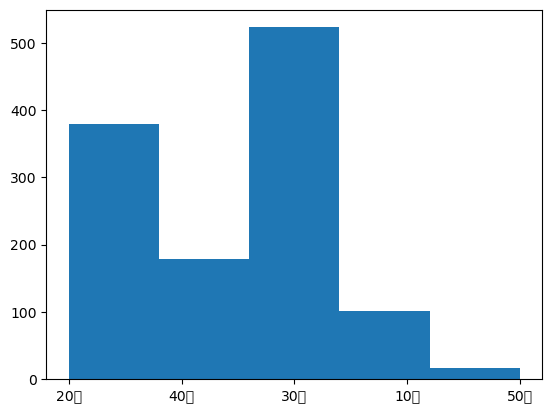

In [32]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train,x="年代",bins=5)
plt.show()


In [ ]:
df_age = df_train.pivot_table("")

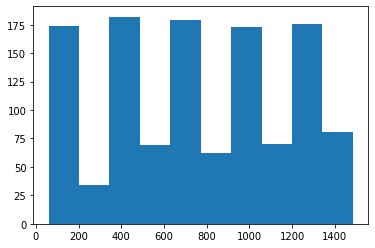

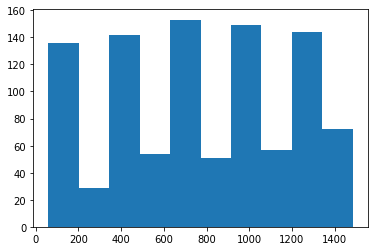

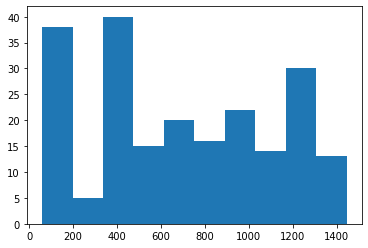

In [38]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train,x="DailyRate",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_no,x="DailyRate",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_yes,x="DailyRate",bins=10)
plt.show()

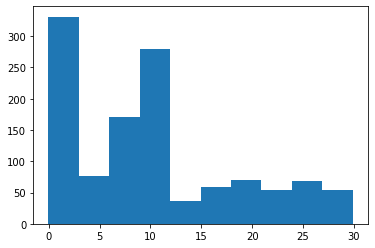

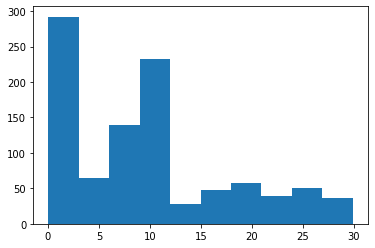

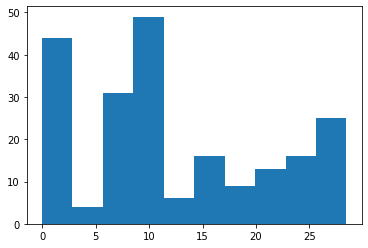

In [49]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train,x="DistanceFromHome",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_no,x="DistanceFromHome",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_yes,x="DistanceFromHome",bins=10)
plt.show()

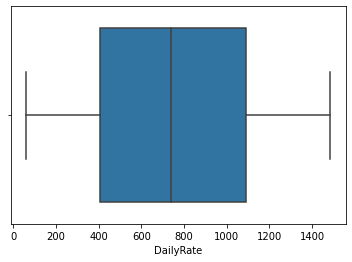

In [54]:
box,ax = plt.subplots()
sns.boxplot(data=df_train,x="DailyRate",ax=ax)
plt.show()